In [142]:
import nibabel as nib
import os
import numpy as np
from scipy.stats import norm
import scipy
import pandas as pd
import matplotlib.pyplot as plt


import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import scipy.stats


wth05_n20 = '/Volumes/camille/IBMA_simu/test1_k025_n20_btw1_wth05_nominal/0001/megaMFX/'
wth10_n20 = '/Volumes/camille/IBMA_simu/test1_k025_n20_btw1_wth10_nominal/0001/megaMFX/'
wth20_n20 = '/Volumes/camille/IBMA_simu/test1_k025_n20_btw1_wth20_nominal/0001/megaMFX/'
wth40_n20 = '/Volumes/camille/IBMA_simu/test1_k025_n20_btw1_wth40_nominal/0001/megaMFX/'
wth80_n20 = '/Volumes/camille/IBMA_simu/test1_k025_n20_btw1_wth80_nominal/0001/megaMFX/'
wthdiff_n20 = '/Volumes/camille/IBMA_simu/test1_k025_n20_btw1_wthdiff_nominal/0001/megaMFX/'
hat_tau_05 = nib.load(os.path.join(wth05_n20, 'stats', 'mean_random_effects_var1.nii.gz')).get_data().flatten()
hat_tau_10 = nib.load(os.path.join(wth10_n20, 'stats', 'mean_random_effects_var1.nii.gz')).get_data().flatten()
hat_tau_20 = nib.load(os.path.join(wth20_n20, 'stats', 'mean_random_effects_var1.nii.gz')).get_data().flatten()
hat_tau_40 = nib.load(os.path.join(wth40_n20, 'stats', 'mean_random_effects_var1.nii.gz')).get_data().flatten()
hat_tau_80 = nib.load(os.path.join(wth80_n20, 'stats', 'mean_random_effects_var1.nii.gz')).get_data().flatten()
hat_tau_diff = nib.load(os.path.join(wthdiff_n20, 'stats', 'mean_random_effects_var1.nii.gz')).get_data().flatten()

In [130]:
scipy.stats.chi2.fit(hat_tau_05/(sigma2/dof), floc=0, fscale=1)

(23.600390625000045, 0, 1)

In [131]:
scipy.stats.chi2.fit(hat_tau_diff/(sigma2/dof), floc=0, fscale=1)

(20.496875000000038, 0, 1)

In [122]:
np.mean(hat_tau_diff)

1.0776312

In [155]:
def distribution_plot(title, data, dist, *args, **kwargs):
    np.random.seed(0)
    num_bins = 100
    

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,5))

    # histogram plot
    n, bins, patches = ax1.hist(data, num_bins, normed=True)

#     # fit distribution and estimate parameters
#     param = dist.fit(data)
#     print(param)
#     y = dist.pdf(bins, *param[:-2], loc=param[-2], scale=param[-1])
    
    # known distribution
    y = dist.pdf(bins, *args)
    
    ax1.plot(bins, y, '-')
    ax1.set_title(title)
    
    # qq-plot plot
    p_th = [t/data.size for t in range(1,data.size+1)]

    line1, = ax2.loglog(p_th, sorted(dist.sf(data, *args)), '.', linewidth=1,
                     label=title)
    ax2.plot(p_th, p_th, '-')
    ax2.set_title('Q-Q plot')


    ax2.legend(loc='lower right')
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.show()
    
def chi2_distribution_plot(data, title, *args, **kwargs):   
    distribution_plot(title, data, scipy.stats.chi2, *args)
    
def t_distribution_plot(data, title, *args, **kwargs):   
    distribution_plot(title, data, scipy.stats.t, *args)

def z_distribution_plot(data, title, *args, **kwargs):    
    distribution_plot(title, data, scipy.stats.norm, *args)

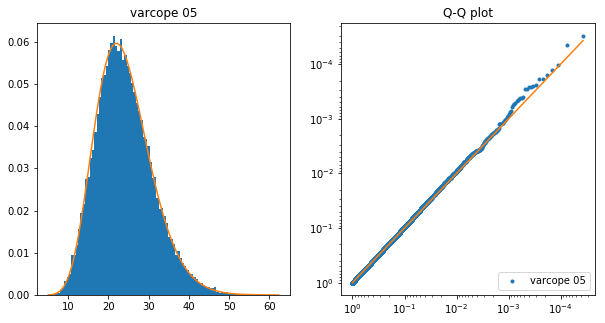

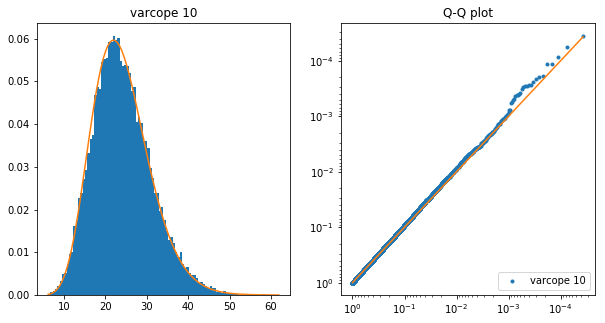

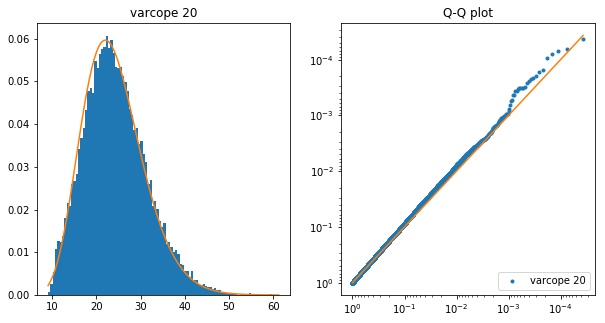

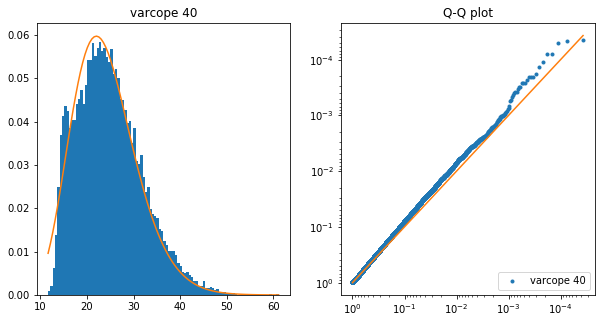

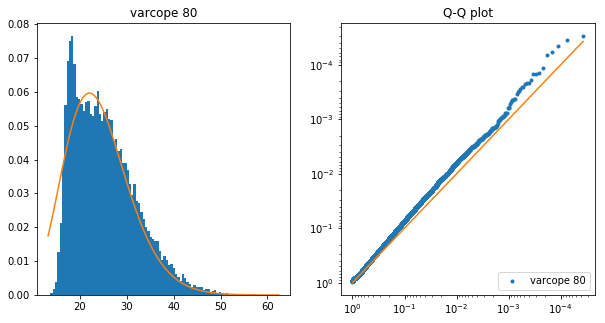

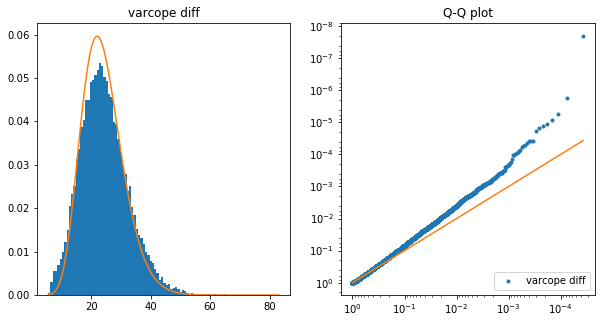

In [171]:
varcope_05 = nib.load(os.path.join(wth05_n20, 'stats', 'varcope1.nii.gz')).get_data().flatten()
varcope_10 = nib.load(os.path.join(wth10_n20, 'stats', 'varcope1.nii.gz')).get_data().flatten()
varcope_20 = nib.load(os.path.join(wth20_n20, 'stats', 'varcope1.nii.gz')).get_data().flatten()
varcope_40 = nib.load(os.path.join(wth40_n20, 'stats', 'varcope1.nii.gz')).get_data().flatten()
varcope_80 = nib.load(os.path.join(wth80_n20, 'stats', 'varcope1.nii.gz')).get_data().flatten()
varcope_diff = nib.load(os.path.join(wthdiff_n20, 'stats', 'varcope1.nii.gz')).get_data().flatten()

np.mean(hat_tau_05)
kstudies = 25
dof = kstudies - 1

chi2_distribution_plot(varcope_05/(1.25/dof/kstudies), 'varcope 05', dof)
chi2_distribution_plot(varcope_10/(1.5/dof/kstudies), 'varcope 10', dof)
chi2_distribution_plot(varcope_20/(2/dof/kstudies), 'varcope 20', dof)
chi2_distribution_plot(varcope_40/(3/dof/kstudies), 'varcope 40', dof)
chi2_distribution_plot(varcope_80/(5/dof/kstudies), 'varcope 80', dof)
chi2_distribution_plot(varcope_diff/(2/dof/kstudies), 'varcope diff', dof)

In [ ]:


chi2_distribution_plot(hat_tau_05/(sigma2/dof), 'hat tau 05', dof)
chi2_distribution_plot(hat_tau_10/(sigma2/dof), 'hat tau 10', dof)
chi2_distribution_plot(hat_tau_20/(sigma2/dof), 'hat tau 20', dof)
chi2_distribution_plot(hat_tau_40/(sigma2/dof), 'hat tau 40', dof)
chi2_distribution_plot(hat_tau_80/(sigma2/dof), 'hat tau 80', dof)
# chi2_distribution_plot(scipy.stats.chi2.rvs(dof, size=100000), 'random variate', dof)
chi2_distribution_plot(hat_tau_diff/(sigma2/dof), 'hat tau diff', dof)

In [144]:
t_05 = nib.load(os.path.join(wth05_n20, 'stats', 'tstat1.nii.gz')).get_data().flatten()
t_10 = nib.load(os.path.join(wth10_n20, 'stats', 'tstat1.nii.gz')).get_data().flatten()
t_20 = nib.load(os.path.join(wth20_n20, 'stats', 'tstat1.nii.gz')).get_data().flatten()
t_40 = nib.load(os.path.join(wth40_n20, 'stats', 'tstat1.nii.gz')).get_data().flatten()
t_80 = nib.load(os.path.join(wth80_n20, 'stats', 'tstat1.nii.gz')).get_data().flatten()
t_diff = nib.load(os.path.join(wthdiff_n20, 'stats', 'tstat1.nii.gz')).get_data().flatten()

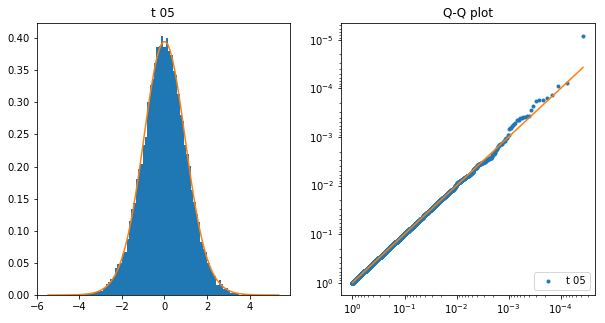

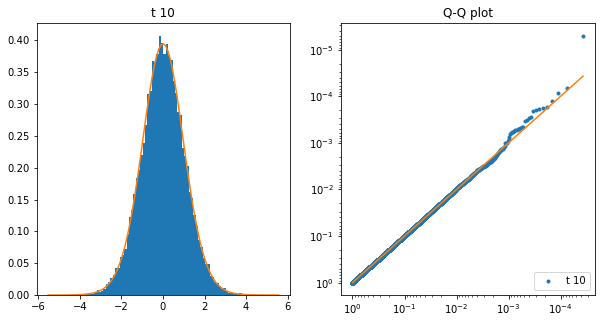

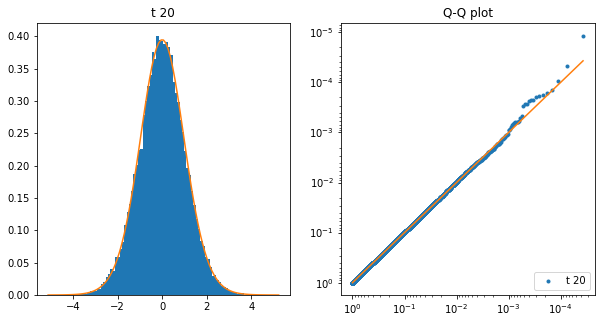

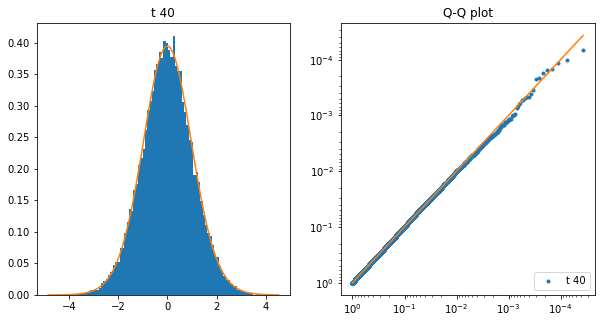

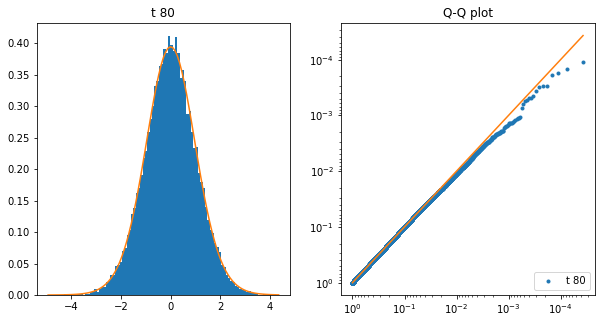

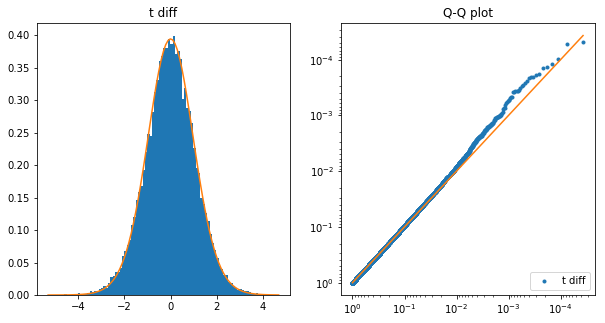

In [151]:
t_distribution_plot(t_05, 't 05', dof)
t_distribution_plot(t_10, 't 10', dof)
t_distribution_plot(t_20, 't 20', dof)
t_distribution_plot(t_40, 't 40', dof)
t_distribution_plot(t_80, 't 80', dof)
t_distribution_plot(t_diff, 't diff', dof)

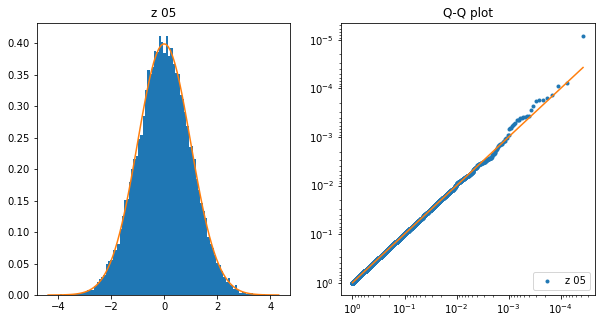

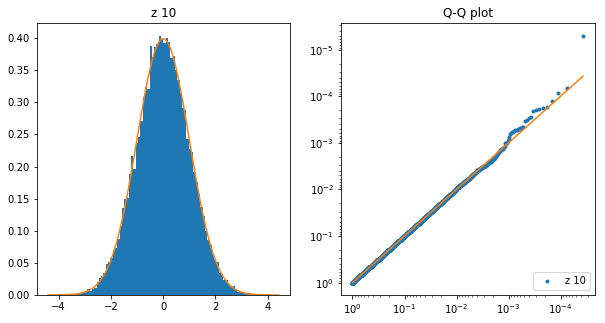

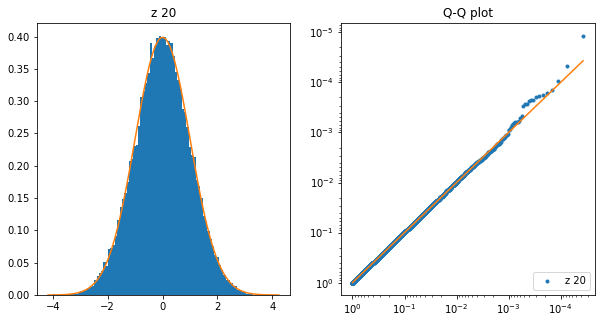

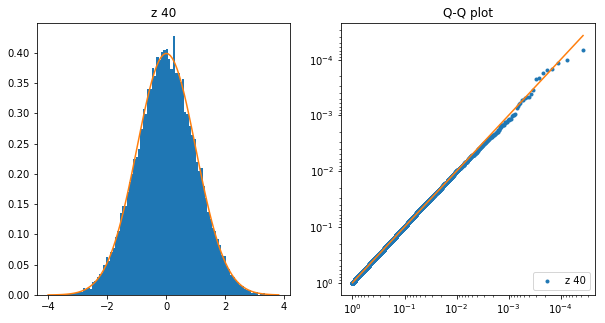

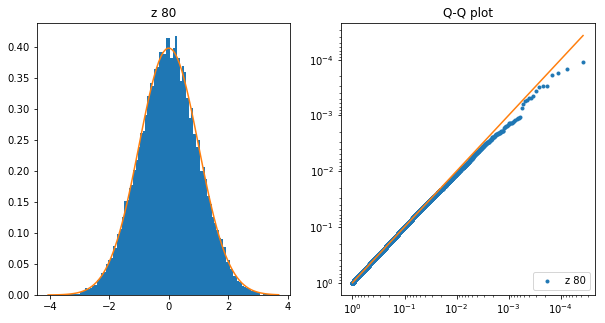

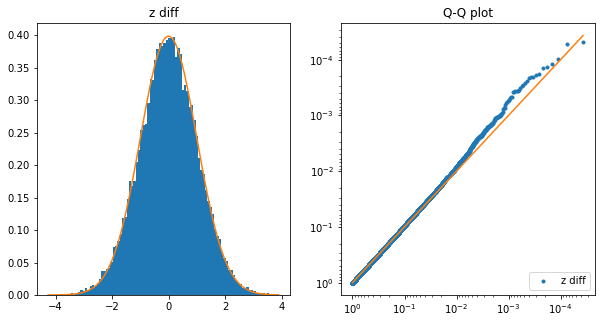

In [150]:
z_05 = nib.load(os.path.join(wth05_n20, 'stats', 'zstat1.nii.gz')).get_data().flatten()
z_10 = nib.load(os.path.join(wth10_n20, 'stats', 'zstat1.nii.gz')).get_data().flatten()
z_20 = nib.load(os.path.join(wth20_n20, 'stats', 'zstat1.nii.gz')).get_data().flatten()
z_40 = nib.load(os.path.join(wth40_n20, 'stats', 'zstat1.nii.gz')).get_data().flatten()
z_80 = nib.load(os.path.join(wth80_n20, 'stats', 'zstat1.nii.gz')).get_data().flatten()
z_diff = nib.load(os.path.join(wthdiff_n20, 'stats', 'zstat1.nii.gz')).get_data().flatten()

z_distribution_plot(z_05, 'z 05')
z_distribution_plot(z_10, 'z 10')
z_distribution_plot(z_20, 'z 20')
z_distribution_plot(z_40, 'z 40')
z_distribution_plot(z_80, 'z 80')
z_distribution_plot(z_diff, 'z diff')

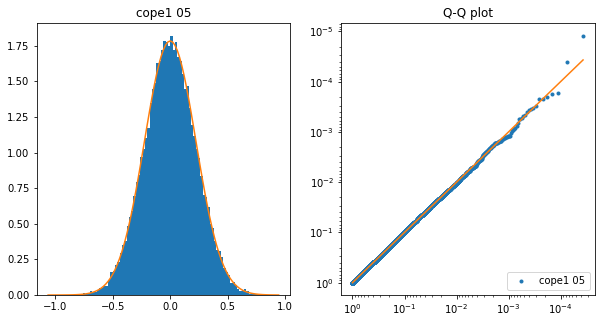

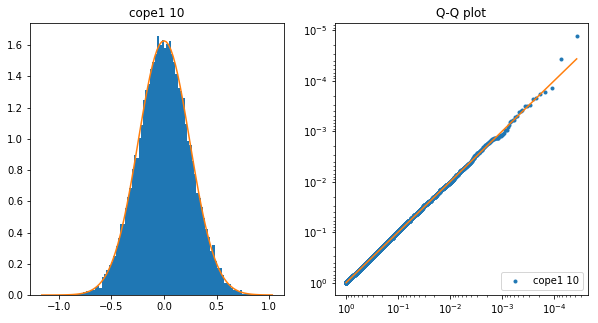

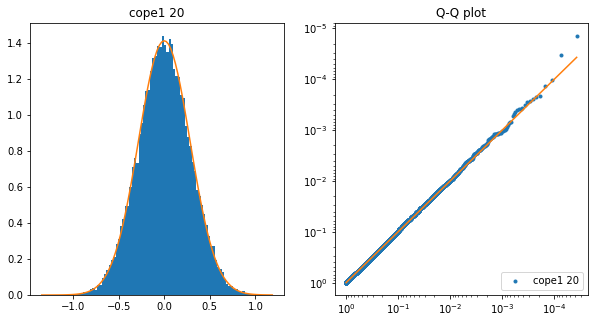

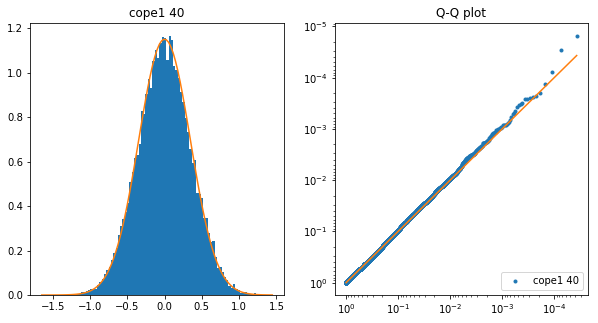

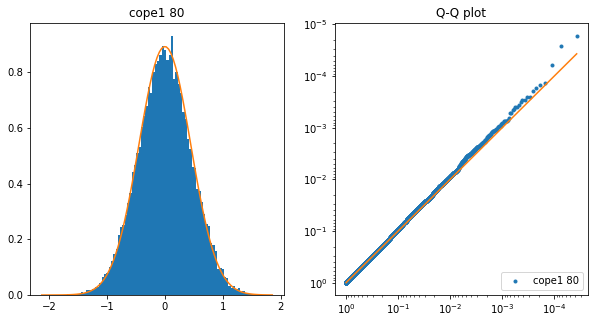

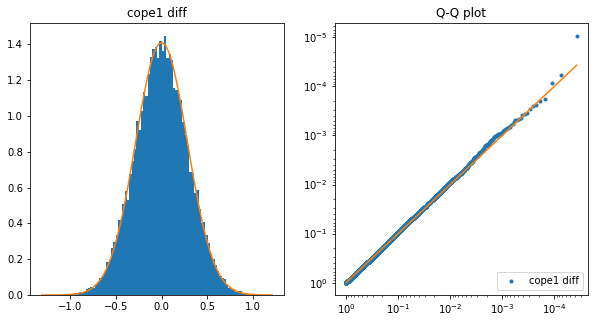

In [170]:
cope_05 = nib.load(os.path.join(wth05_n20, 'stats', 'cope1.nii.gz')).get_data().flatten()
cope_10 = nib.load(os.path.join(wth10_n20, 'stats', 'cope1.nii.gz')).get_data().flatten()
cope_20 = nib.load(os.path.join(wth20_n20, 'stats', 'cope1.nii.gz')).get_data().flatten()
cope_40 = nib.load(os.path.join(wth40_n20, 'stats', 'cope1.nii.gz')).get_data().flatten()
cope_80 = nib.load(os.path.join(wth80_n20, 'stats', 'cope1.nii.gz')).get_data().flatten()
cope_diff = nib.load(os.path.join(wthdiff_n20, 'stats', 'cope1.nii.gz')).get_data().flatten()

tau2=1
z_distribution_plot(cope_05, 'cope1 05', 0, np.sqrt((tau2+0.25)/kstudies))
z_distribution_plot(cope_10, 'cope1 10', 0, np.sqrt((tau2+0.5)/kstudies))
z_distribution_plot(cope_20, 'cope1 20', 0, np.sqrt((tau2+1)/kstudies))
z_distribution_plot(cope_40, 'cope1 40', 0, np.sqrt((tau2+2)/kstudies))
z_distribution_plot(cope_80, 'cope1 80', 0, np.sqrt((tau2+4)/kstudies))
z_distribution_plot(cope_diff, 'cope1 diff', 0, np.sqrt((tau2+1)/kstudies))